<a href="https://colab.research.google.com/github/jabarcmun/INTELIGENCIA-ARTIFICIAL-/blob/main/INTELIGENCIA%20ARTIFICIAL%20/Tarea%204%3A%20MulticapaCopia_de_Clasif_flor_del_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris     # Se cargan datos
iris = load_iris()                        # Se carga variable iris

In [ ]:
print(iris.keys())                        # Visualiza dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
iris.target_names                         # Nombres de 3 flores (clases)
iris.target                               # Clase numérica por flor
iris.data                                 # Medidas de pétalos y sépalos
iris.feature_names                        # Nombres de las 4 medidas

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
import pandas as pd                        # Se import pandas para tablas
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])  # Se genera tabla con medidas
iris_df                                   # Se muestran

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris_df.describe()                        # Resumen

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X = iris_df                               # Entrada de medidas
y = pd.get_dummies(iris.target).values    # Salida de clase

In [ ]:
from sklearn.model_selection import train_test_split   # Para partir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)  # 90 % entrena, 10 % prueba

In [ ]:
print(X_train.shape)                      # Entrenamiento
print(X_test.shape)                       # Prueba

(135, 4)
(15, 4)


In [ ]:
from sklearn.preprocessing import StandardScaler   # Normaliza
scaler = StandardScaler()                 # Escalador
X_train = scaler.fit_transform(X_train)   # Ajusta y convierte entrenamiento
X_test = scaler.transform(X_test)         # Convierte prueba con ajuste

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([                     # Red neuronal:
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # 64 neuronas
    Dense(32, activation='relu'),         # 32 neuronas RELU
    Dense(3, activation='softmax'),       # 3 neuronas softmax por flor
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.001                     # Velocidad de aprendizaje
adam_optimizer = Adam(learning_rate=learning_rate)

In [ ]:
modelo.compile(                            # Compila modelo
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',       # Errorde clases
    metrics=['accuracy']                   # Porcentaje aciertos
)

In [ ]:
history = modelo.fit(                      # Entrenamiento
    X_train, y_train,
    epochs=10, batch_size=1,               # 10 epocas, 1 muestra
    validation_data=(X_test, y_test)       # Se valida
)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5465 - loss: 0.9531 - val_accuracy: 0.8667 - val_loss: 0.4360
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8521 - loss: 0.4023 - val_accuracy: 0.8667 - val_loss: 0.2634
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8756 - loss: 0.2621 - val_accuracy: 1.0000 - val_loss: 0.1574
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8966 - loss: 0.2450 - val_accuracy: 1.0000 - val_loss: 0.1424
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9460 - loss: 0.1632 - val_accuracy: 1.0000 - val_loss: 0.1149
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9824 - loss: 0.1144 - val_accuracy: 1.0000 - val_loss: 0.1528
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9777 - loss: 0.1100 - val_accuracy: 1.0000 - val_loss: 0.0838
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9604 - loss: 0.0848 - val_accuracy: 1.

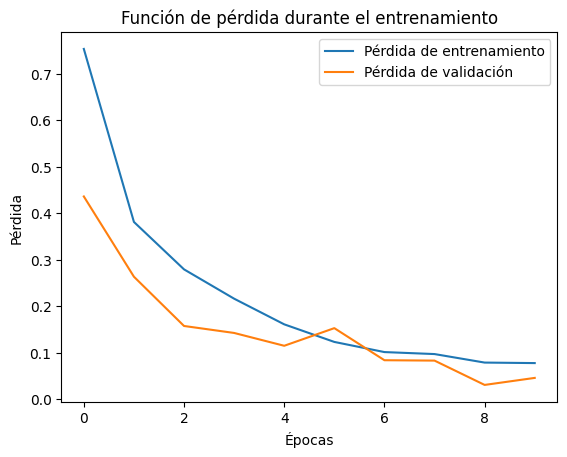

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()                                # Gráfico de entenamiento y validación

In [ ]:
loss, accuracy = modelo.evaluate(X_test, y_test)  # Se miden datos nuevos
print(f'Loss: {loss}, Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 1.0000 - loss: 0.0622
Loss: 0.062211569398641586, Accuracy: 1.0


In [ ]:
predictions = modelo.predict(X_test)      # Probabilidadesde predic
predicted_classes = np.argmax(predictions, axis=1)  # Clase con mayor prob.
actual_classes = np.argmax(y_test, axis=1)          # Clase real

comparison = pd.DataFrame({'Actual Class Index': actual_classes,
                           'Predicted Class Index': predicted_classes})
comparison['Actual Flower'] = [iris.target_names[i] for i in actual_classes]
comparison['Predicted Flower'] = [iris.target_names[i] for i in predicted_classes]
print(comparison.head())                  # Tabla: real vs predicción

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
   Actual Class Index  Predicted Class Index Actual Flower Predicted Flower
0                   1                      1    versicolor       versicolor
1                   0                      0        setosa           setosa
2                   2                      2     virginica        virginica
3                   1                      1    versicolor       versicolor
4                   1                      1    versicolor       versicolor


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


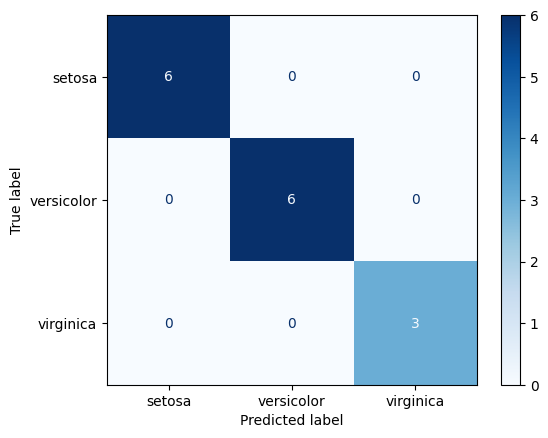

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 1.0


In [ ]:
import numpy as np                                    # Para trabajar con arrays
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score  # Métricas y gráficos

y_pred = modelo.predict(X_test)                     # Predicciones en porcentajes
y_pred_classes = np.argmax(y_pred, axis=1)          # Clase ganadora (0,1,2)
y_test_classes = np.argmax(y_test, axis=1)          # Clase real (0,1,2)

cm = confusion_matrix(y_test_classes, y_pred_classes)  # Tabla de aciertos/errores
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)  # Recall por flor

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')                             # Pinta la matriz de confusión
plt.show()

print('Sensitivity (Recall) for each class:')       # % de éxitos por tipo de flor
for i in range(3):
    print(f'Class {i}: {sensitivity[i]}')